In [5]:
from graph_tool.all import *
import graph_tool.all as gt
import random
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import time
import os
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
from tqdm import tqdm

In [6]:
Node = 200
number_of_module = 5
w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]
w_list = ["{:.2f}".format(item) for item in w_list]
net = "SF"
beta = 1

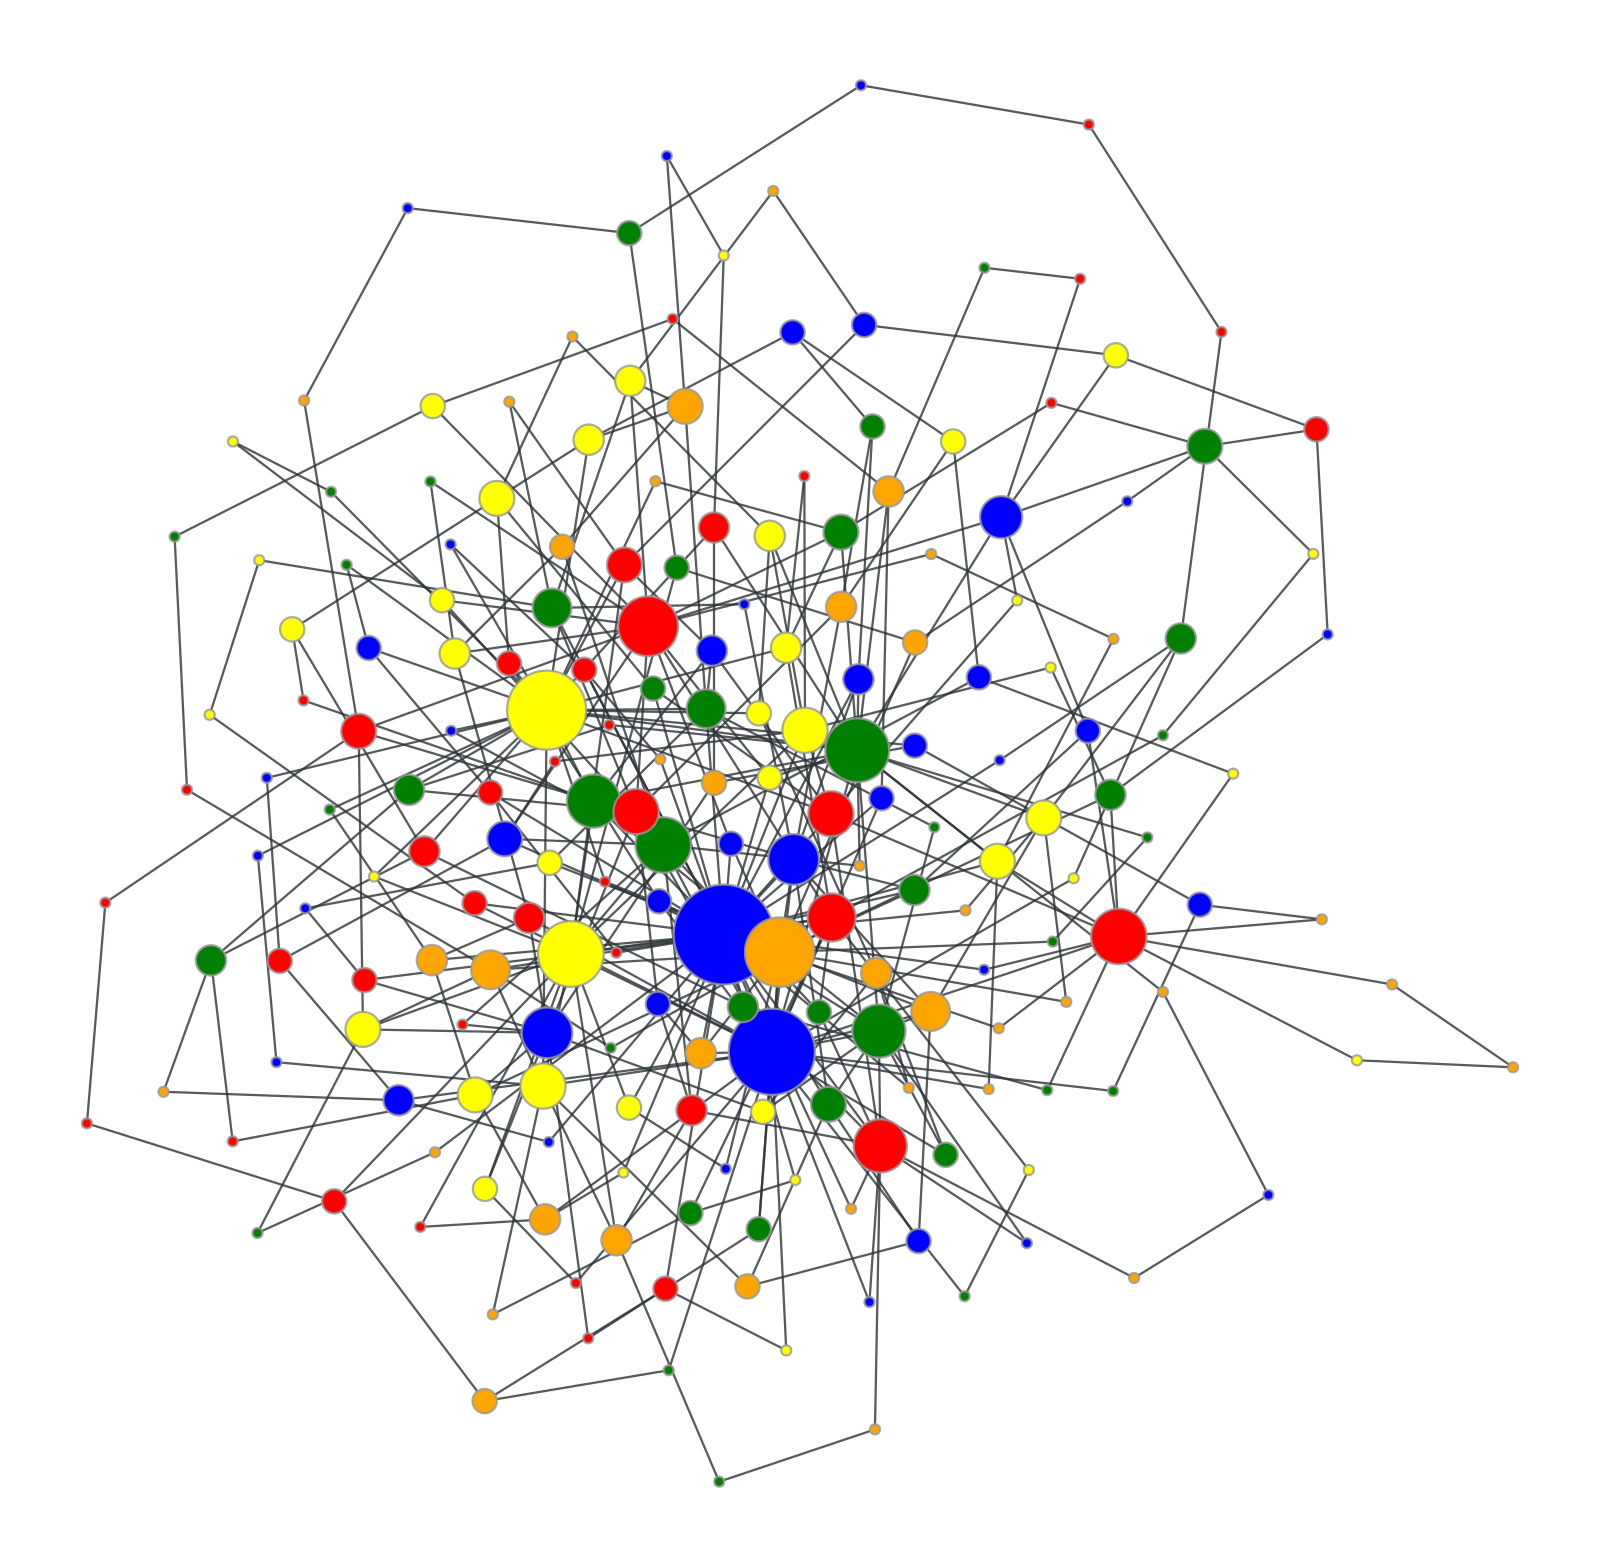

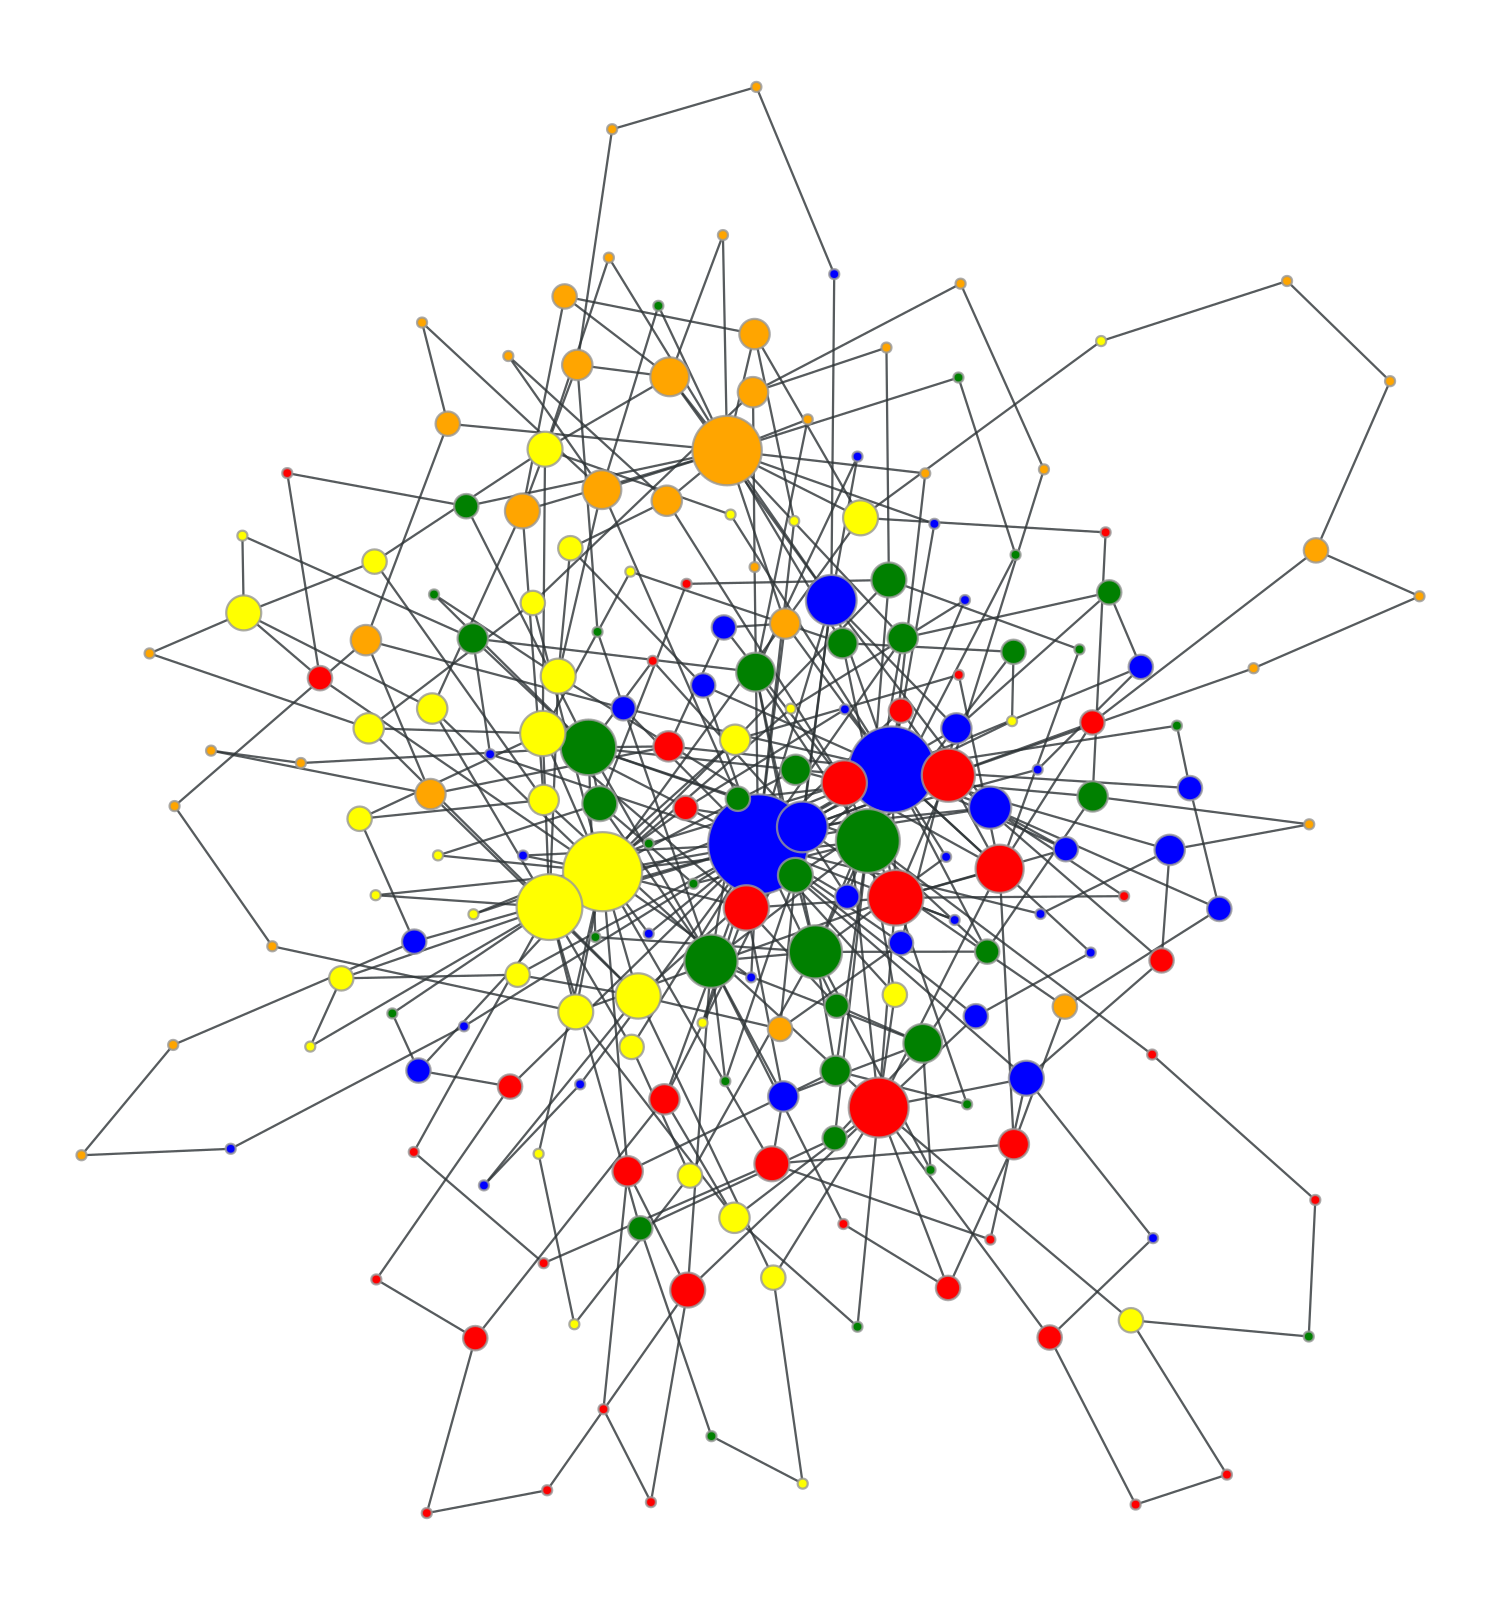

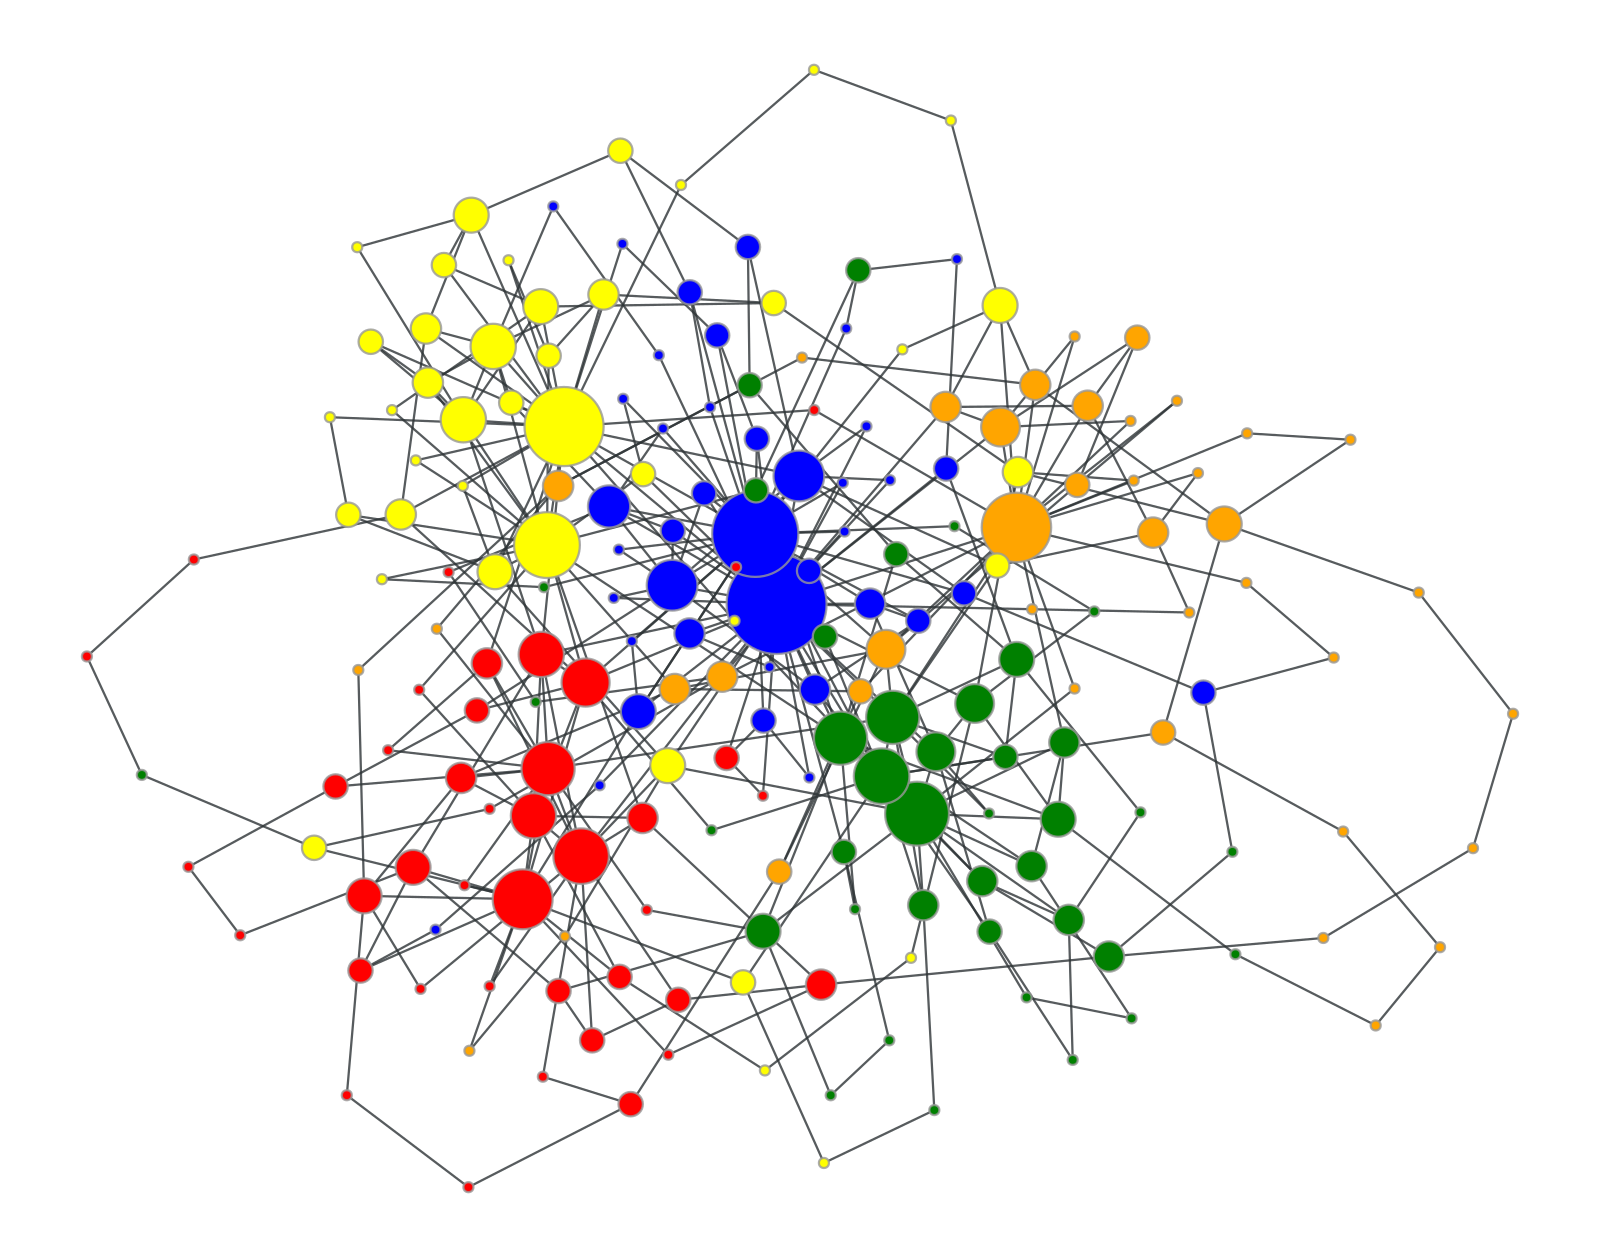

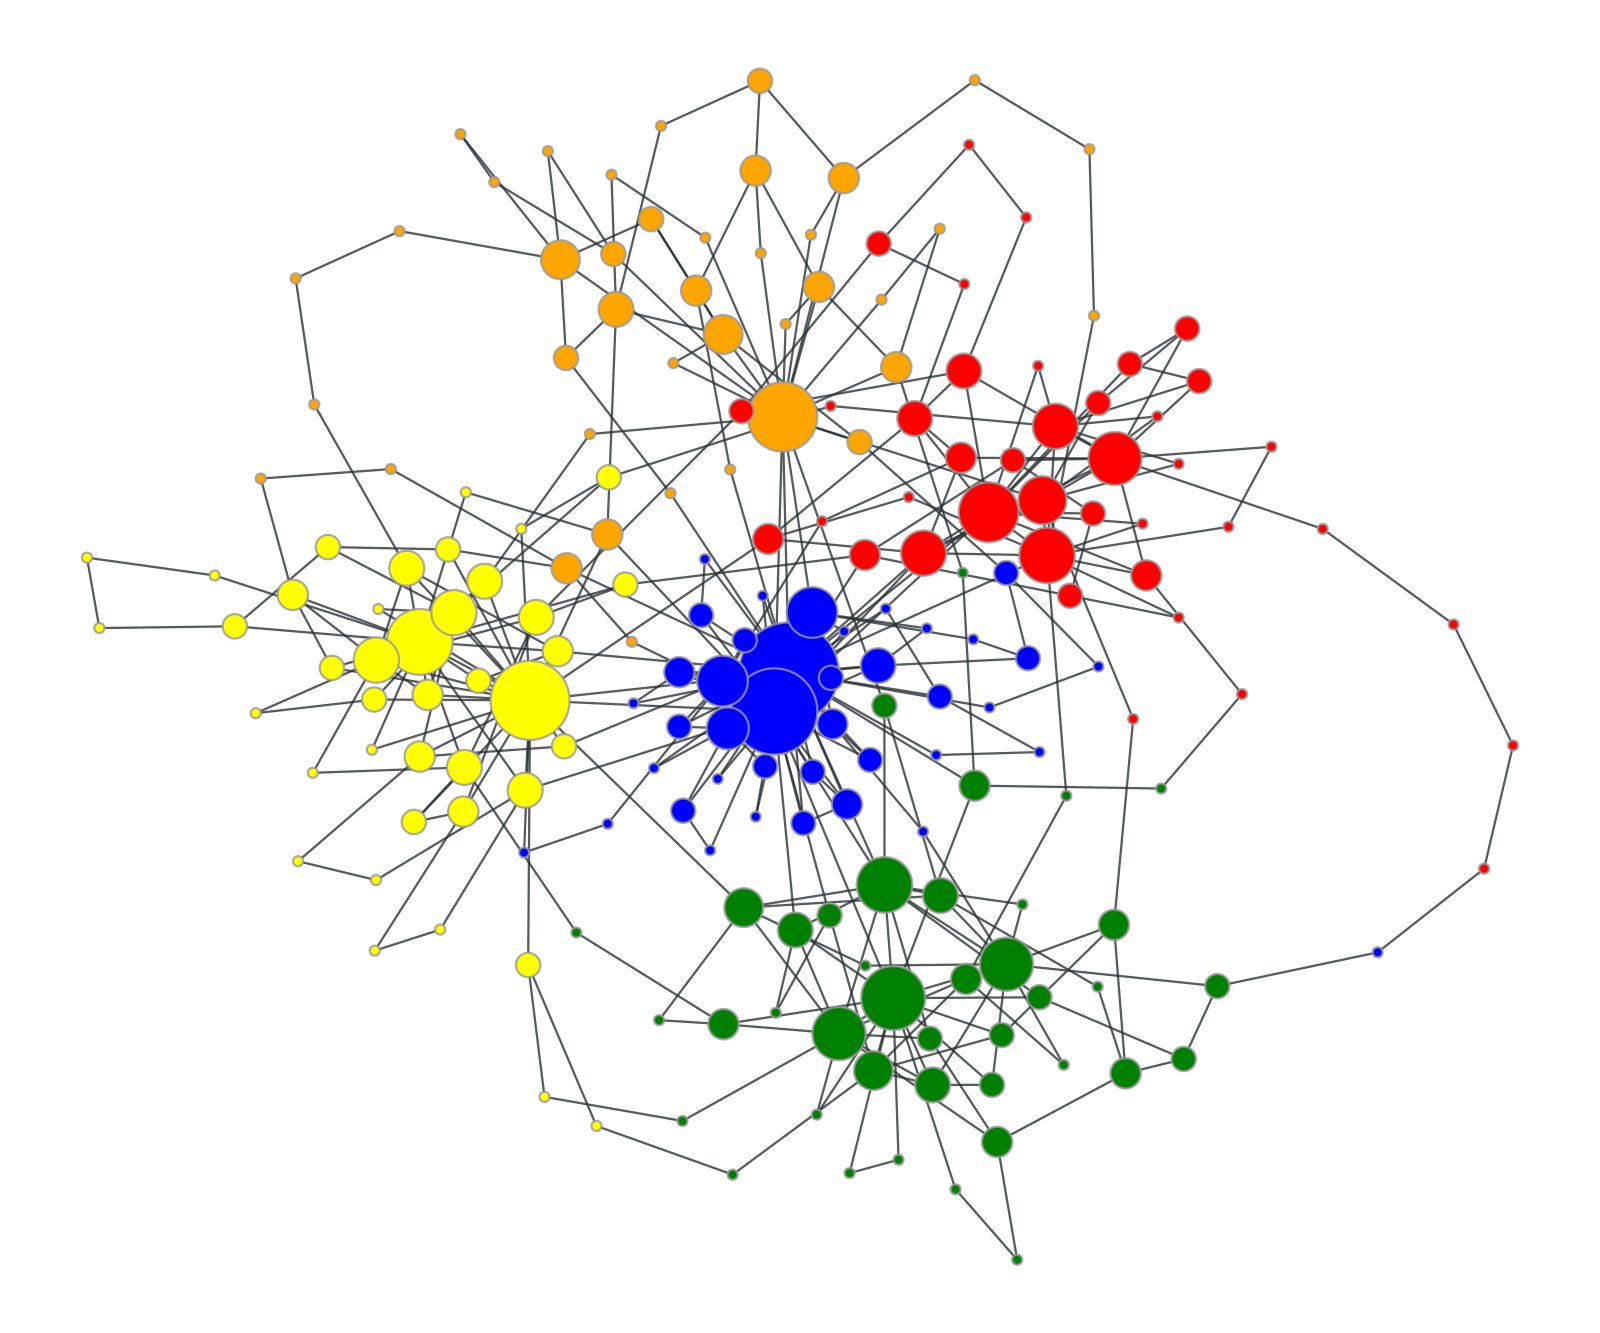

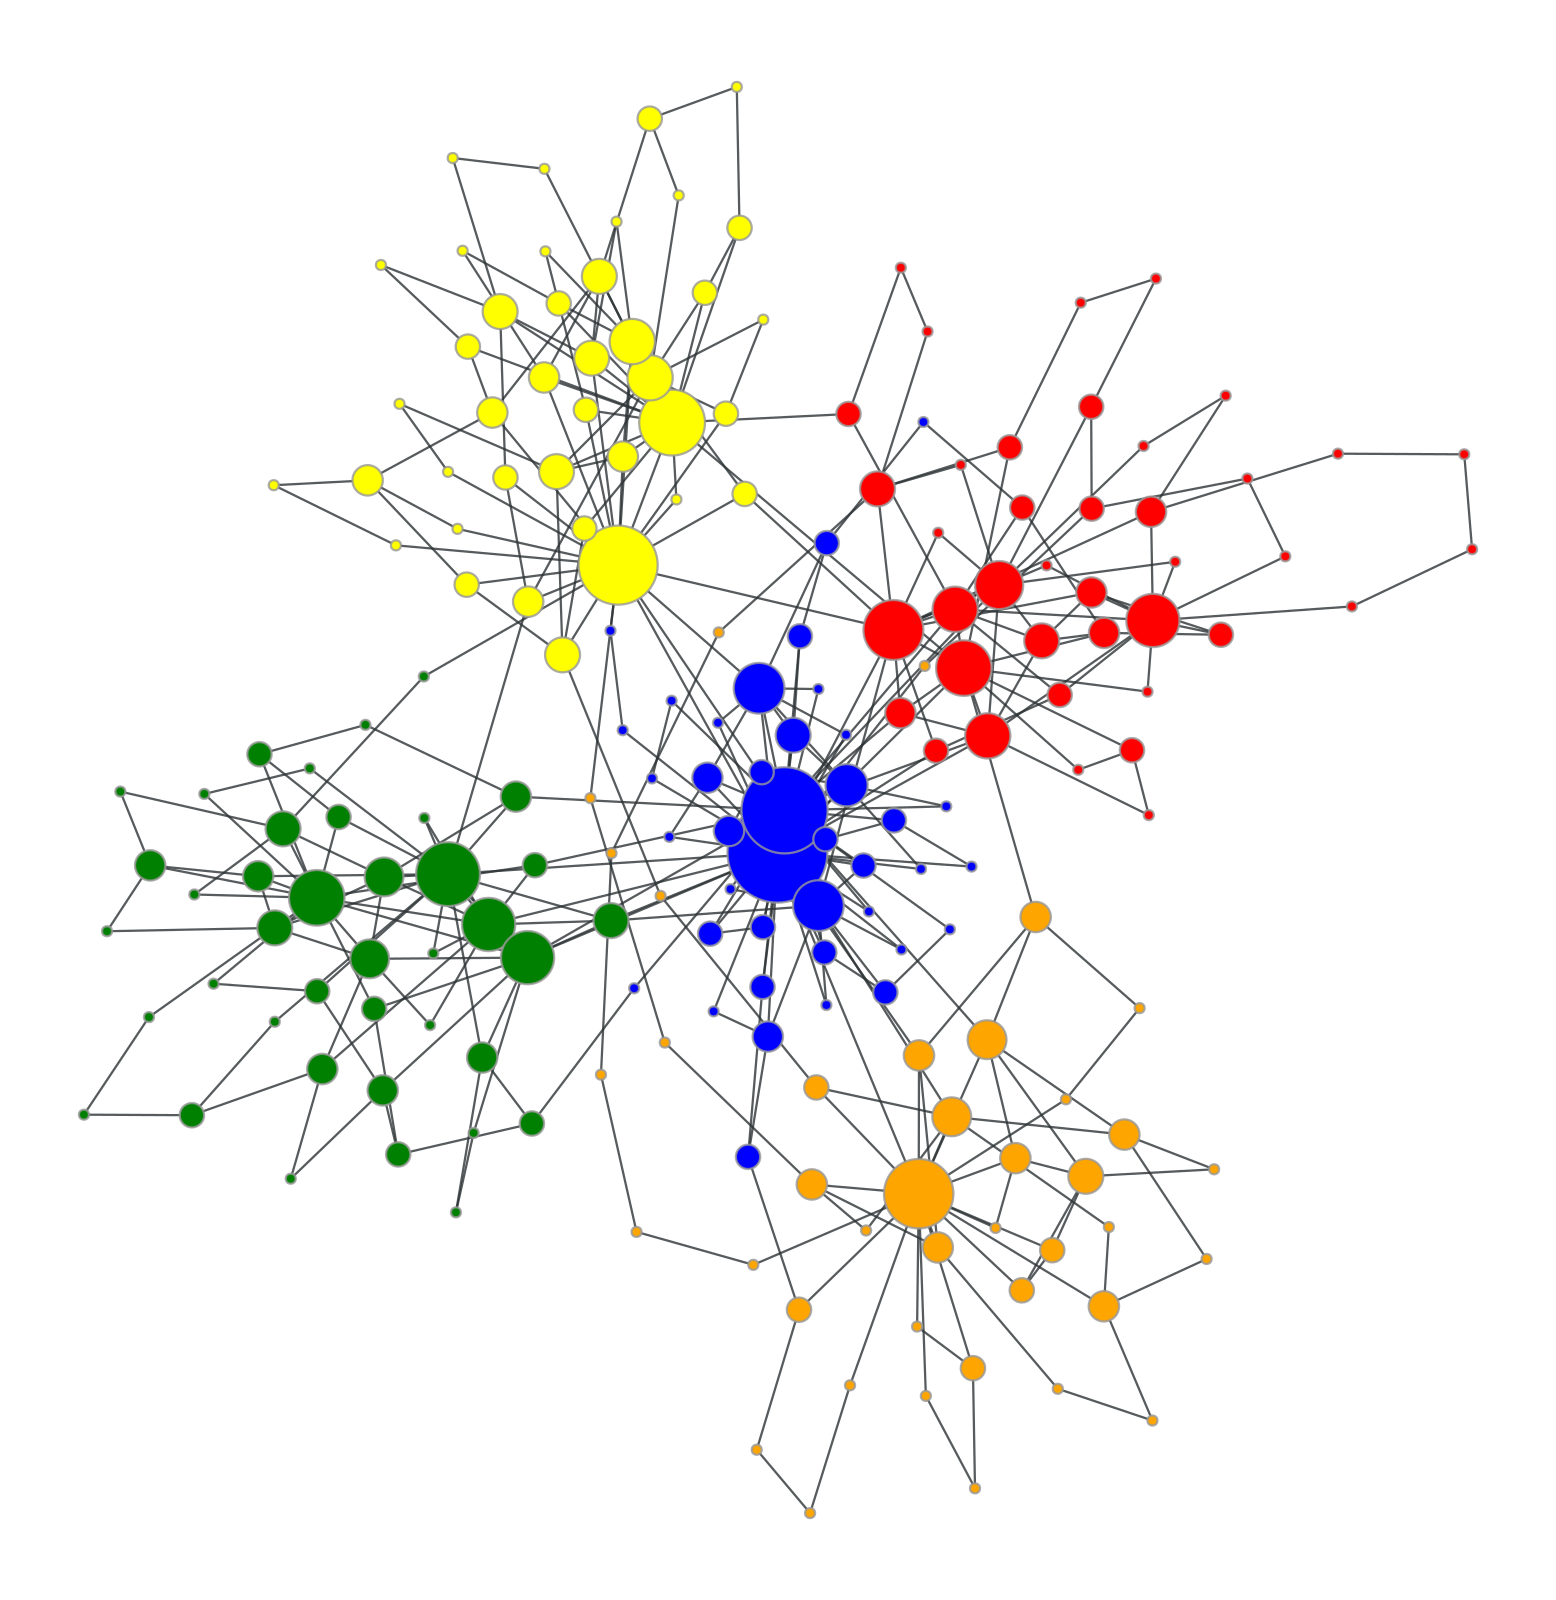

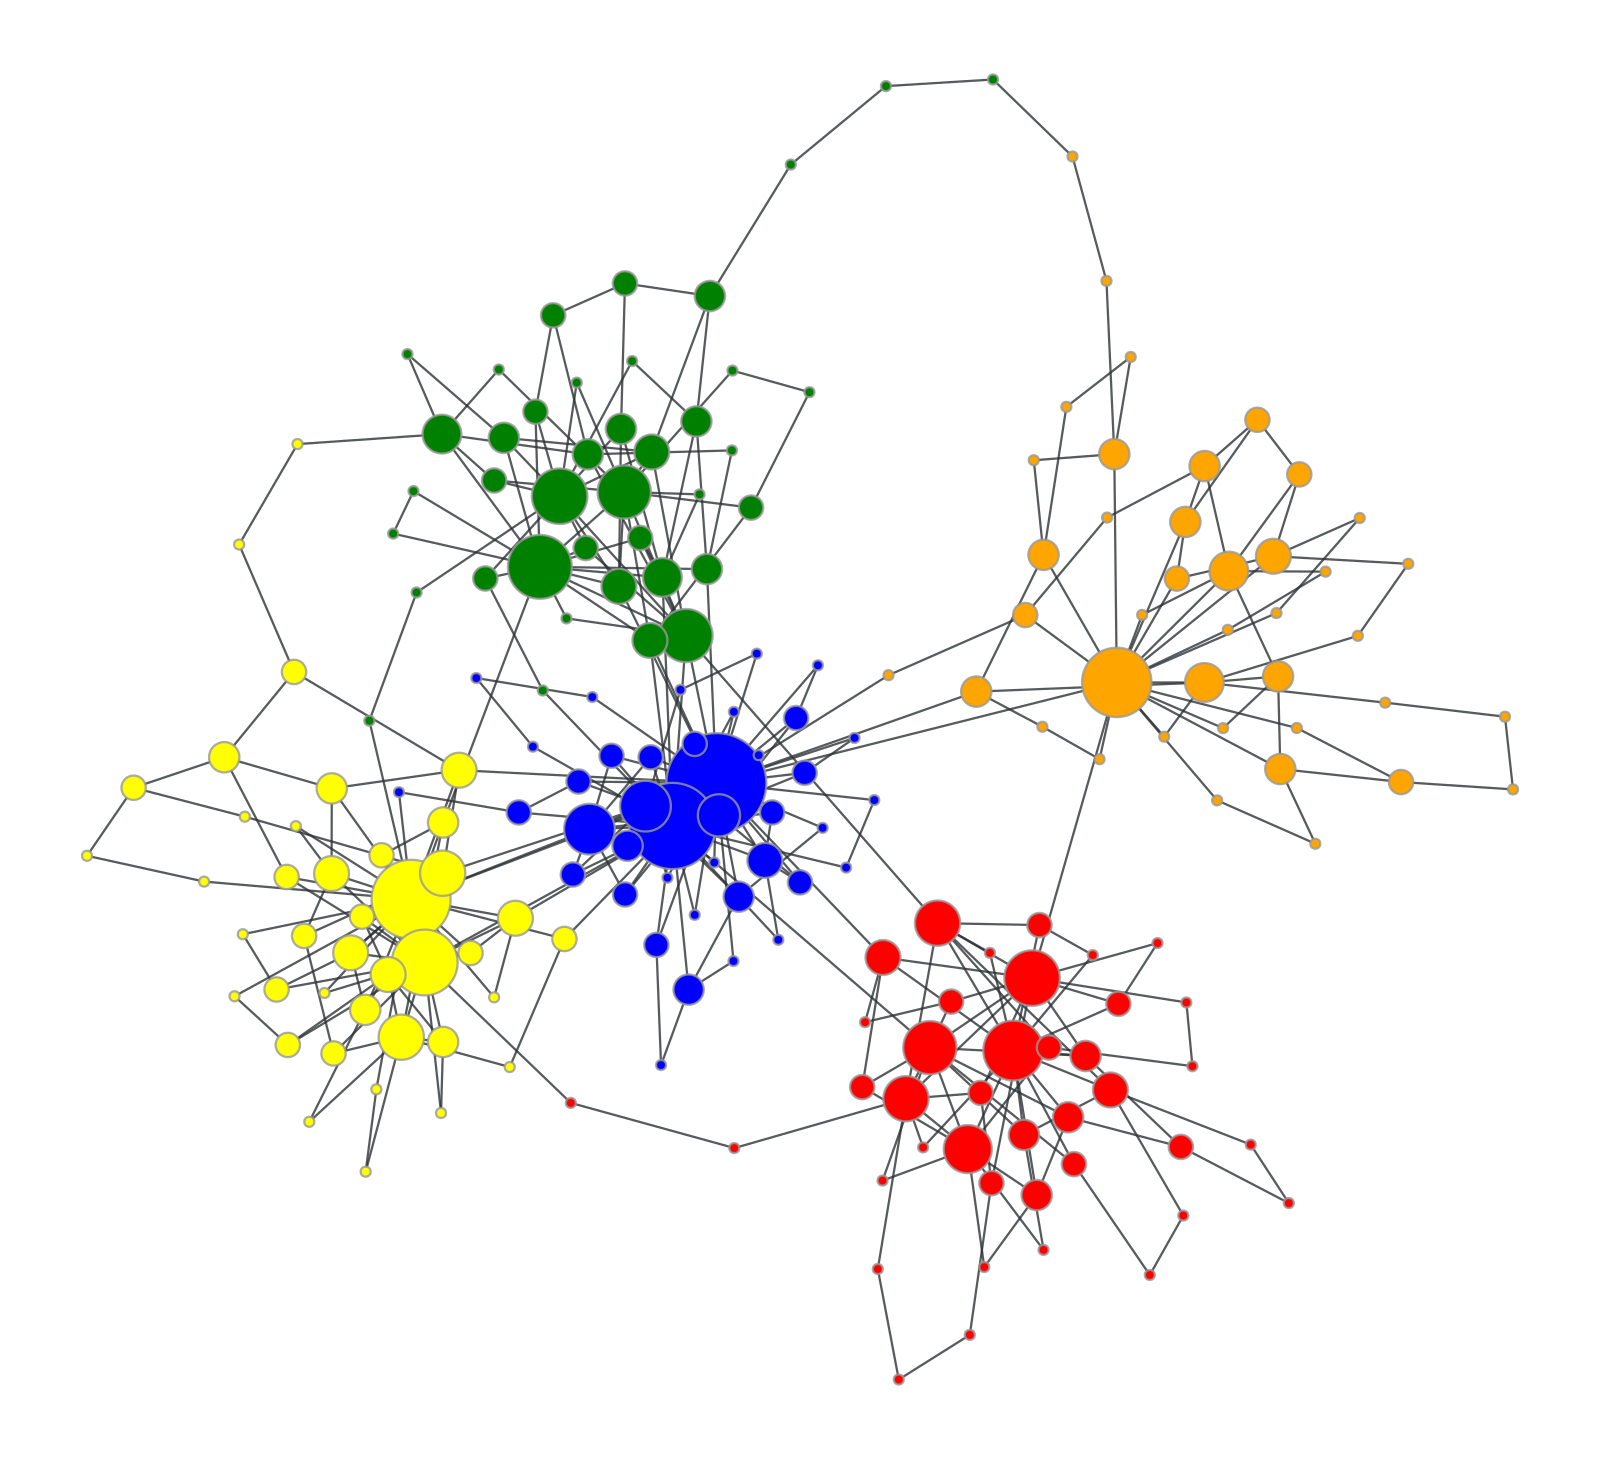

<Figure size 640x480 with 0 Axes>

In [8]:
for w in w_list:
    
    g = load_graph(f"~/path/name/file/name")
    
    # Layoutアルゴリズムで頂点の位置を決定
    pos = gt.sfdp_layout(g)

    # モジュール番号に基づいてノードに色づけ
    color = g.vertex_properties["module_number"] # gのプロパティであるmodule_numberをcolorに格納
    number_of_module = max(color.a)
    vertex_colors = g.new_vertex_property("vector<float>") # ｇに新しいプロパティであるvertex_colorsを作成
    
    #cmap = cm.get_cmap('tab20', number_of_module) # 20種類の異なる色を提供
    #cmap = [cmap(i) for i in range(number_of_module)]
    #cmap = mcolors.ListedColormap(cmap)
    
    # Define the desired colors for each module
    custom_colors = ["red", "orange", "yellow", "green", "blue"]

    # Create a custom colormap with the specified colors
    cmap = mcolors.ListedColormap(custom_colors)
    
    cmap = cmap  # Use the custom colormap directly

    for v in g.vertices():
        module_number = color[v]
        # module_numberを元にcmapから色を取得、モジュール番号を10で割った余りを計算し、0から1の範囲に正規化
        rgba_color = cmap((module_number - 1) % number_of_module / (number_of_module - 1)) 
        vertex_colors[v] = rgba_color
        
    deg = g.degree_property_map("total")

    gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_colors, vertex_size = gt.prop_to_size(deg,mi=5,ma=50,log=False), output_size=(800, 800),output = None)

In [9]:
for w in w_list:
    
    g = load_graph(f"~/o_t_hayashilab/try_modular_net/only_plot/{net}/w={w}/m0={number_of_module}/0.gt.gz")
    
    # Layoutアルゴリズムで頂点の位置を決定
    pos = gt.sfdp_layout(g)

    # モジュール番号に基づいてノードに色づけ
    color = g.vertex_properties["module_number"]  # gのプロパティであるmodule_numberをcolorに格納
    number_of_module = max(color.a)
    vertex_colors = g.new_vertex_property("vector<float>")  # gに新しいプロパティであるvertex_colorsを作成
    
    # Define the desired colors for each module
    custom_colors = ["red", "orange", "yellow", "green", "blue"]

    # Create a custom colormap with the specified colors
    cmap = mcolors.ListedColormap(custom_colors)

    for v in g.vertices():
        module_number = color[v]
        # module_numberを元にcmapから色を取得、モジュール番号を10で割った余りを計算し、0から1の範囲に正規化
        rgba_color = cmap((module_number - 1) % number_of_module / (number_of_module - 1)) 
        vertex_colors[v] = rgba_color
        
    deg = g.degree_property_map("total")
    
    # 保存先のディレクトリを指定
    save_dir = os.path.expanduser('~/o_t_hayashilab/modular_net/plot_data/')
    os.makedirs(save_dir, exist_ok=True)  # ディレクトリが存在しない場合は作成
    save_path = os.path.join(save_dir, f"vis_N200_SF_w{w}.eps")
    
    # グラフを描画し、保存
    gt.graph_draw(g, pos=pos, vertex_fill_color=vertex_colors, vertex_size=gt.prop_to_size(deg, mi=5, ma=50, log=False), output_size=(800, 800), output=save_path)